<a href="https://colab.research.google.com/github/maffant20/Assignment-5/blob/main/Neural_Network_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

#Load Data
np.random.seed(6) #For reproducibility
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()

#Dataset characteristics
print('Training Images Size: {}'.format(X_train.shape))
print(X_train[0].shape)

Training Images Size: (50000, 32, 32, 3)
(32, 32, 3)


In [13]:
print(X_train.shape)
print(Y_train.shape)


(50000, 32, 32, 3)
(50000, 1)


In [14]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]
print(Y_train.shape)
print(Y_train[0])


(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
def plot_sam(X,Y,ide):

  plt.figure(figsize = (15,2))
  plt.imshow(X[ide])
  for i in range(10):
    if Y[ide][i]==1:
      cl = classes[i]
  plt.xlabel(cl)
  plt.show()

In [16]:

ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                         layers.Flatten(),
                         layers.Dense(1000, activation = 'relu'),
                         layers.Dense(400, activation = 'relu'),
                         layers.Dense(300, activation = 'relu'),
                         layers.Dense(200, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax')
])
ann.compile(tf.keras.optimizers.Adam(learning_rate = 0.003),
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
print('Training Loss and Accuracy')
history =ann.fit(X_train, Y_train, epochs = 5)


Training Loss and Accuracy
Epoch 1/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.9611 - accuracy: 0.2825
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.8034 - accuracy: 0.3463
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.7466 - accuracy: 0.3684
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.7083 - accuracy: 0.3818
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6826 - accuracy: 0.3929


Accuracy is pretty low i.e., 39.29%

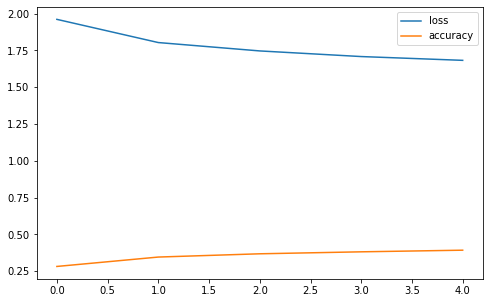

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [18]:
ann.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.6870 - accuracy: 0.3992


[1.6869622468948364, 0.3991999924182892]

Same accuracy on Test Set

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
print(y_pred.shape)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(y_pred_classes)


313/313 [==============================] - 3s 10ms/step
(10000, 10)
[3, 8, 8, 8, 4, 6, 3, 2, 2, 1, 8, 9, 6, 7, 9, 8, 3, 0, 8, 6, 2, 0, 0, 1, 2, 6, 6, 0, 1, 6, 6, 5, 2, 5, 9, 7, 3, 9, 1, 3, 8, 6, 9, 6, 0, 9, 3, 8, 4, 4, 9, 0, 6, 3, 8, 8, 5, 1, 9, 2, 4, 3, 7, 9, 6, 2, 1, 0, 3, 9, 2, 4, 8, 8, 9, 2, 9, 3, 3, 8, 8, 1, 1, 0, 0, 0, 8, 8, 8, 8, 8, 2, 8, 2, 2, 3, 2, 0, 2, 7, 0, 3, 6, 3, 1, 1, 3, 6, 8, 5, 6, 2, 6, 2, 9, 6, 0, 9, 6, 5, 8, 3, 1, 4, 8, 6, 8, 5, 3, 0, 2, 1, 9, 9, 1, 2, 9, 2, 2, 8, 3, 8, 9, 3, 8, 0, 6, 5, 5, 5, 8, 8, 0, 8, 0, 3, 2, 8, 3, 0, 0, 1, 3, 4, 8, 7, 8, 6, 7, 9, 9, 0, 8, 8, 7, 9, 8, 3, 3, 0, 8, 7, 6, 8, 7, 8, 6, 3, 0, 0, 6, 3, 2, 3, 7, 4, 9, 0, 5, 0, 5, 8, 8, 2, 8, 3, 8, 3, 7, 8, 3, 1, 1, 9, 9, 3, 8, 9, 0, 7, 2, 3, 8, 3, 9, 7, 3, 2, 0, 3, 5, 1, 6, 3, 8, 0, 6, 0, 3, 5, 1, 8, 7, 8, 0, 6, 7, 0, 2, 1, 2, 3, 3, 9, 6, 0, 1, 9, 8, 3, 8, 8, 3, 3, 0, 8, 8, 4, 9, 0, 2, 3, 6, 5, 1, 2, 9, 2, 3, 5, 7, 3, 0, 1, 8, 9, 8, 8, 0, 9, 1, 6, 6, 8, 3, 2, 6, 0, 0, 4, 6, 5, 2, 8, 6, 8, 8, 2, 1, 4, 8

In [22]:
print(y_pred)

[[0.05837957 0.05569479 0.06988634 ... 0.05362349 0.03863745 0.04622556]
 [0.08361205 0.10103206 0.00360765 ... 0.00182044 0.6284742  0.17737497]
 [0.10190178 0.02217165 0.00442144 ... 0.00128981 0.83850586 0.02794374]
 ...
 [0.01845082 0.00970216 0.07511228 ... 0.0741753  0.01166503 0.0217627 ]
 [0.02138715 0.00785122 0.10327742 ... 0.06134199 0.00360973 0.01472111]
 [0.05639346 0.006139   0.26069048 ... 0.20233755 0.00589711 0.0103383 ]]


In [24]:
print(Y_test[:20])


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [25]:
rounded_labels=np.argmax(Y_test, axis=1)
print(rounded_labels[:20])

[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


In [26]:
 print('classification Report: \n', classification_report(rounded_labels,y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.52      0.46      1000
           1       0.53      0.52      0.53      1000
           2       0.27      0.33      0.30      1000
           3       0.27      0.36      0.31      1000
           4       0.39      0.18      0.25      1000
           5       0.39      0.24      0.29      1000
           6       0.41      0.45      0.43      1000
           7       0.54      0.33      0.41      1000
           8       0.42      0.66      0.51      1000
           9       0.48      0.41      0.44      1000

    accuracy                           0.40     10000
   macro avg       0.41      0.40      0.39     10000
weighted avg       0.41      0.40      0.39     10000



Class wise Precision, Recall and F1 Score.

So We will use CNN to improve performance of thise model.